### Primero se importan las bibliotecas necesarias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split


### Funciones utiles

In [3]:
def analizar_categorias(dataframe):
    categorias_histograma = dataframe.groupby('categories').size().sort_values(ascending=False)
    len(categorias_histograma)

    categorias_unicas = {}
    for index, cantidad in categorias_histograma.items():
        for categoria in index.split(','):
            if categoria in categorias_unicas:
                categorias_unicas[categoria] += cantidad
            else:
                categorias_unicas[categoria] = cantidad

    categorias_unicas_ordenadas = dict(sorted(categorias_unicas.items(), key=lambda x: x[1], reverse=True))
    return categorias_unicas_ordenadas

# El codigo para generar los graficos 2d y 3d fue extraido y adaptado de: https://matplotlib.org/stable/gallery/index.html

def plot_categories_distribution(categorias_dict, title="Distribución de Categorías", top_n=20):
    top_categories = list(categorias_dict.keys())[:top_n]
    top_values = list(categorias_dict.values())[:top_n]

    total_top_values = sum(top_values)
    total_all_values = sum(categorias_dict.values())
    otros_value = total_all_values - total_top_values

    if otros_value > 0:
        plot_categories = top_categories + ['Otros']
        plot_values = top_values + [otros_value]
    else:
        plot_categories = top_categories
        plot_values = top_values

    plt.figure(figsize=(12, 8))
    colors = ['#4ECDC4'] * len(top_categories) + (['#FF6B6B'] if otros_value > 0 else [])
    bars = plt.barh(range(len(plot_categories)), plot_values,
                    color=colors, alpha=0.8, edgecolor='white', linewidth=1.5)

    plt.title(title, fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Número de Items', fontsize=14, fontweight='bold')
    plt.ylabel('Categorías', fontsize=14, fontweight='bold')

    plt.yticks(range(len(plot_categories)), plot_categories, fontsize=10)

    plt.gca().invert_yaxis()

    for i, (bar, value) in enumerate(zip(bars, plot_values)):
        width = bar.get_width()
        plt.text(width + max(plot_values) * 0.01, bar.get_y() + bar.get_height()/2,
                f'{value:,}', ha='left', va='center',
                fontweight='bold', fontsize=10)

        percentage = (value / total_all_values) * 100
        plt.text(width/2, bar.get_y() + bar.get_height()/2,
                f'{percentage:.1f}%', ha='center', va='center',
                fontweight='bold', fontsize=9, color='white')

    plt.grid(True, alpha=0.3, axis='x')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_color('#333333')
    plt.gca().spines['bottom'].set_color('#333333')

    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

    plt.tight_layout()
    os.makedirs('graficos analisis datos', exist_ok=True)
    plt.savefig(os.path.join('graficos analisis datos', f"{title}.png"), bbox_inches='tight')
    plt.show()

def plot_rating_distribution(ratings, texto_titulo):
    rating_counts = ratings.value_counts().sort_index()

    if len(rating_counts) > 5:
        plt.figure(figsize=(12, 6))
        bars = plt.bar(rating_counts.index, rating_counts.values,
                    alpha=0.8, edgecolor='white', linewidth=1.5)
    else:
        plt.figure(figsize=(10, 6))
        bars = plt.bar(rating_counts.index, rating_counts.values,
                    color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57'],
                    alpha=0.8, edgecolor='white', linewidth=1.5)

    title = f'Distribución de Ratings {texto_titulo}'
    plt.title(title,
            fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Rating', fontsize=14, fontweight='bold')
    plt.ylabel('Frecuencia', fontsize=14, fontweight='bold')

    if len(rating_counts) <= 5:
        plt.xticks([1, 2, 3, 4, 5], ['1', '2', '3', '4', '5'], fontsize=12)
    else:
        plt.xticks(rating_counts.index, [str(x) for x in rating_counts.index], fontsize=12)

    for i, (bar, count) in enumerate(zip(bars, rating_counts.values)):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + max(rating_counts.values) * 0.01,
                f'{count:,}', ha='center', va='bottom',
                fontweight='bold', fontsize=11)

        percentage = (count / rating_counts.sum()) * 100
        plt.text(bar.get_x() + bar.get_width()/2., height/2,
                f'{percentage:.1f}%', ha='center', va='center',
                fontweight='bold', fontsize=10, color='black')

    plt.grid(True, alpha=0.3, axis='y')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_color('#333333')
    plt.gca().spines['bottom'].set_color('#333333')

    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

    plt.tight_layout()
    os.makedirs('graficos analisis datos', exist_ok=True)
    plt.savefig(os.path.join('graficos analisis datos', f"{title}.png"), bbox_inches='tight')
    plt.show()

def plot_long_tail_distribution(data, title, xlabel, ylabel, top_n=20):
    if isinstance(data, dict):
        sorted_data = dict(sorted(data.items(), key=lambda x: x[0], reverse=False))
    else:
        sorted_data = data.sort_index()

    top_categories = list(sorted_data.keys())[:top_n] if isinstance(data, dict) else sorted_data.index[:top_n]
    top_values = list(sorted_data.values())[:top_n] if isinstance(data, dict) else sorted_data.values[:top_n]

    plot_categories = list(top_categories)
    plot_values = list(top_values)

    plt.figure(figsize=(15, 8))
    bars = plt.bar(range(len(plot_categories)), plot_values,
                    color=['#FF6B6B' if i == len(plot_categories) else '#4ECDC4' for i in range(len(plot_categories))],
                    alpha=0.8, edgecolor='white', linewidth=1.5)

    plt.title(title, fontsize=18, fontweight='bold', pad=20)
    plt.xlabel(xlabel, fontsize=14, fontweight='bold')
    plt.ylabel(ylabel, fontsize=14, fontweight='bold')

    plt.xticks(range(len(plot_categories)), plot_categories, rotation=45, ha='right', fontsize=10)

    for i, (bar, value) in enumerate(zip(bars, plot_values)):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + max(plot_values) * 0.01,
                f'{value:,}', ha='center', va='bottom',
                fontweight='bold', fontsize=10)

        percentage = (value / sum(plot_values)) * 100
        plt.text(bar.get_x() + bar.get_width()/2., height/2,
                f'{percentage:.1f}%', ha='center', va='center',
                fontweight='bold', fontsize=9, color='white')

    plt.grid(True, alpha=0.3, axis='y')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_color('#333333')
    plt.gca().spines['bottom'].set_color('#333333')

    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

    plt.tight_layout()
    os.makedirs('graficos analisis datos', exist_ok=True)
    plt.savefig(os.path.join('graficos analisis datos', f"{title}.png"), bbox_inches='tight')
    plt.show()

def plot_ratings_over_time(dataframe, title="Distribución de Ratings a lo largo del tiempo"):
    df_copy = dataframe.copy()
    df_copy['timestamp'] = pd.to_datetime(df_copy['timestamp'])
    df_copy['year'] = df_copy['timestamp'].dt.year

    ratings_by_year = df_copy.groupby('year').size()
    avg_rating_by_year = df_copy.groupby('year')['rating'].mean()

    plt.figure(figsize=(15, 8))

    bars = plt.bar(ratings_by_year.index, ratings_by_year.values,
                   color='#4ECDC4', alpha=0.8, edgecolor='white', linewidth=1.5)

    plt.title(title, fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Año', fontsize=14, fontweight='bold')
    plt.ylabel('Número de Ratings', fontsize=14, fontweight='bold')

    for i, bar in enumerate(bars):
        year = ratings_by_year.index[i]
        height = bar.get_height()
        avg_rating = avg_rating_by_year[year]

        plt.text(bar.get_x() + bar.get_width()/2., height + max(ratings_by_year.values) * 0.01,
                f'{int(height):,}', ha='center', va='bottom',
                fontweight='bold', fontsize=11)

        plt.text(bar.get_x() + bar.get_width()/2., height/2,
                f'{avg_rating:.2f}', ha='center', va='center',
                fontweight='bold', fontsize=10, color='white')

    plt.grid(True, alpha=0.3, axis='y')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_color('#333333')
    plt.gca().spines['bottom'].set_color('#333333')

    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

    if len(ratings_by_year) > 10:
        plt.xticks(rotation=45)

    plt.tight_layout()
    os.makedirs('graficos analisis datos', exist_ok=True)
    plt.savefig(os.path.join('graficos analisis datos', f"{title}.png"), bbox_inches='tight')
    plt.show()

def plot_price_vs_rating(dataframe, title="Relación entre Precio y Rating"):
    df_with_price = dataframe.dropna(subset=['price'])
    df_without_price = dataframe[dataframe['price'].isna()]

    plt.figure(figsize=(12, 8))

    plt.scatter(df_with_price['price'], df_with_price['average_rating'],
                alpha=0.6, s=30, color='#4ECDC4', edgecolors='white', linewidth=0.5,
                label=f'Con precio ({len(df_with_price):,} items)')

    if len(df_without_price) > 0:
        plt.scatter([0] * len(df_without_price), df_without_price['average_rating'],
                    alpha=0.6, s=30, color='#2ECC71', edgecolors='white', linewidth=0.5,
                    label=f'Sin precio ({len(df_without_price):,} items)')

    plt.title(title, fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Precio ($)', fontsize=14, fontweight='bold')
    plt.ylabel('Rating Promedio', fontsize=14, fontweight='bold')

    plt.xlim(-10, 400)
    plt.ylim(0.5, 5.5)

    plt.grid(True, alpha=0.3)

    if len(df_with_price) > 1:
        correlation = df_with_price['price'].corr(df_with_price['average_rating'])
        plt.text(0.02, 0.98, f'Correlación: {correlation:.3f}',
                    transform=plt.gca().transAxes, fontsize=12, fontweight='bold',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

        z = np.polyfit(df_with_price['price'], df_with_price['average_rating'], 1)
        p = np.poly1d(z)
        plt.plot(df_with_price['price'].sort_values(),
                    p(df_with_price['price'].sort_values()),
                    "r--", alpha=0.8, linewidth=2, label=f'Tendencia')

    plt.legend()

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_color('#333333')
    plt.gca().spines['bottom'].set_color('#333333')

    plt.tight_layout()
    os.makedirs('graficos analisis datos', exist_ok=True)
    plt.savefig(os.path.join('graficos analisis datos', f"{title}.png"), bbox_inches='tight')
    plt.show()

    print(f"Número de items con precio: {len(df_with_price):,}")
    if len(df_with_price) > 0:
        print(f"Precio promedio: ${df_with_price['price'].mean():.2f}")
        print(f"Rating promedio (con precio): {df_with_price['average_rating'].mean():.2f}")
        correlation = df_with_price['price'].corr(df_with_price['average_rating'])
        print(f"Correlación precio-rating: {correlation:.3f}")

    print(f"Número de items sin precio: {len(df_without_price):,}")
    if len(df_without_price) > 0:
        print(f"Rating promedio (sin precio): {df_without_price['average_rating'].mean():.2f}")

### Primero se cargan los datos necesarios

In [4]:
df = pd.read_csv("ratings.csv")

In [6]:
df = df.copy()
df["label"] = (df["rating"] >= 4).astype(int)

In [8]:
train_data, test_data = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df["label"]
)

### Cantidad de datos

In [11]:
# Numero de usuarios únicos en train y test
cantidad_ratings_train = len(train_data)
numero_usuarios_train = train_data['userId'].nunique()
cantidad_ratings_test = len(test_data)
numero_usuarios_test = test_data['userId'].nunique()
print("Número de ratings en train:", cantidad_ratings_train)
print("Número de usuarios únicos en train:", numero_usuarios_train)
print("Número de ratings en test:", cantidad_ratings_test)
print("Número de usuarios únicos en test:", numero_usuarios_test)

# Se verifica que sean los mismos usuarios
print(f"Son los mismos usuarios?: {train_data['userId'].unique().sort() == test_data['userId'].unique().sort()}")


Número de ratings en train: 800167
Número de usuarios únicos en train: 6040
Número de ratings en test: 200042
Número de usuarios únicos en test: 6038
Son los mismos usuarios?: True


In [19]:
# Numero de items en train
numero_items_train = train_data['movieId'].nunique()
print("Número de items en train:", numero_items_train)

# Numero de items en test
numero_items_test = test_data['movieId'].nunique()
print("Número de items en validation:", numero_items_test)

elementos_test = test_data['movieId'].unique().tolist()
elementos_train = train_data['movieId'].unique().tolist()
contador = 0
for elemento in elementos_test:
    if elemento in elementos_train:
        contador += 1

print("Número de items en test que están en train:", contador, str(round((contador/len(elementos_test))*100,1)) + "%")


Número de items en train: 3682
Número de items en validation: 3439
Número de items en test que están en train: 3415 99.3%


### Promedios de ratings

In [13]:
# Promedio de cantidad de ratings por usuario en train
cantidad_ratings_usuario_train = train_data.groupby('userId').size()
promedio_ratings_usuario = round(cantidad_ratings_usuario_train.mean(), 1)
std_ratings_usuario = round(cantidad_ratings_usuario_train.std(), 1)
print("Promedio de ratings por usuario en train:", promedio_ratings_usuario)
print("Desviación estándar de ratings por usuario en train:", std_ratings_usuario)

# Promedio de cantidad de ratings por usuario en test
cantidad_ratings_usuario_test = test_data.groupby('userId').size()
promedio_ratings_usuario_test = round(cantidad_ratings_usuario_test.mean(), 1)
std_ratings_usuario_test = round(cantidad_ratings_usuario_test.std(), 1)
print("Promedio de ratings por usuario en test:", promedio_ratings_usuario_test)
print("Desviación estándar de ratings por usuario en test:", std_ratings_usuario_test)

Promedio de ratings por usuario en train: 132.5
Desviación estándar de ratings por usuario en train: 154.3
Promedio de ratings por usuario en test: 33.1
Desviación estándar de ratings por usuario en test: 38.9


In [14]:
# Promedio de ratings por item en train
cantidad_ratings_item_train = train_data.groupby('movieId').size()
promedio_ratings_item = round(cantidad_ratings_item_train.mean(), 1)
std_ratings_item = round(cantidad_ratings_item_train.std(), 1)
print("Promedio de ratings por item en train:", promedio_ratings_item)
print("Desviación estándar de ratings por item en train:", std_ratings_item)

# Promedio de ratings por item en test
cantidad_ratings_item_test = test_data.groupby('movieId').size()
promedio_ratings_item_test = round(cantidad_ratings_item_test.mean(), 1)
std_ratings_item_test = round(cantidad_ratings_item_test.std(), 1)
print("Promedio de ratings por item en test:", promedio_ratings_item_test)
print("Desviación estándar de ratings por item en validation:", std_ratings_item_test)

Promedio de ratings por item en train: 217.3
Desviación estándar de ratings por item en train: 307.9
Promedio de ratings por item en test: 58.2
Desviación estándar de ratings por item en validation: 78.4


In [16]:
# Promedio de todos los ratings en train
promedio_rating_train = round(train_data['rating'].mean(), 2)
std_rating_train = round(train_data['rating'].std(), 2)
print("Promedio de todos los ratings en train:", promedio_rating_train)
print("Desviación estándar de todos los ratings en train:", std_rating_train)

# Promedio de todos los ratings en test
promedio_rating_test = round(test_data['rating'].mean(), 2)
std_rating_test = round(test_data['rating'].std(), 2)
print("Promedio de todos los ratings en test:", promedio_rating_test)
print("Desviación estándar de todos los ratings en test:", std_rating_test)

# Promedio de todos los ratings en train, por item
promedio_rating_item_train = round(train_data.groupby('movieId')['rating'].mean().mean(), 2)
std_rating_item_train = round(train_data.groupby('movieId')['rating'].mean().std(), 2)
print("Promedio de todos los ratings en train, por item:", promedio_rating_item_train)
print("Desviación estándar de todos los ratings en train, por item:", std_rating_item_train)

# Promedio de todos los ratings en test, por item
promedio_rating_item_test = round(test_data.groupby('movieId')['rating'].mean().mean(), 2)
std_rating_item_test = round(test_data.groupby('movieId')['rating'].mean().std(), 2)
print("Promedio de todos los ratings en test, por item:", promedio_rating_item_test)
print("Desviación estándar de todos los ratings en test, por item:", std_rating_item_test)


Promedio de todos los ratings en train: 3.58
Desviación estándar de todos los ratings en train: 1.12
Promedio de todos los ratings en test: 3.58
Desviación estándar de todos los ratings en test: 1.12
Promedio de todos los ratings en train, por item: 3.24
Desviación estándar de todos los ratings en train, por item: 0.68
Promedio de todos los ratings en test, por item: 3.26
Desviación estándar de todos los ratings en test, por item: 0.7


### Valores extremos

In [17]:
# Cantidad maxima de ratings por un usuario en train
cantidad_maxima_ratings_usuario_train = cantidad_ratings_usuario_train.max()
print("Cantidad máxima de ratings por un usuario en train:", cantidad_maxima_ratings_usuario_train)

# Cantidad maxima de ratings por un usuario en test
cantidad_maxima_ratings_usuario_test = cantidad_ratings_usuario_test.max()
print("Cantidad máxima de ratings por un usuario en test:", cantidad_maxima_ratings_usuario_test)

# Cantidad maxima de ratings a un item en train
cantidad_maxima_ratings_item_train = cantidad_ratings_item_train.max()
print("Cantidad máxima de ratings a un item en train:", cantidad_maxima_ratings_item_train)

# Cantidad maxima de ratings a un item en test
cantidad_maxima_ratings_item_test = cantidad_ratings_item_test.max()
print("Cantidad máxima de ratings a un item en test:", cantidad_maxima_ratings_item_test)


Cantidad máxima de ratings por un usuario en train: 1892
Cantidad máxima de ratings por un usuario en test: 422
Cantidad máxima de ratings a un item en train: 2740
Cantidad máxima de ratings a un item en test: 688


### Densidad matrices

In [20]:
# Densidad en train
densidad_train = (cantidad_ratings_train/(numero_usuarios_train * numero_items_train))*100
densidad_test = (cantidad_ratings_test/(numero_usuarios_test * numero_items_test))*100
print("Densidad en train:", round(densidad_train, 4),"%")
print("Densidad en test:", round(densidad_test, 4),"%")

Densidad en train: 3.598 %
Densidad en test: 0.9634 %


### Graficos

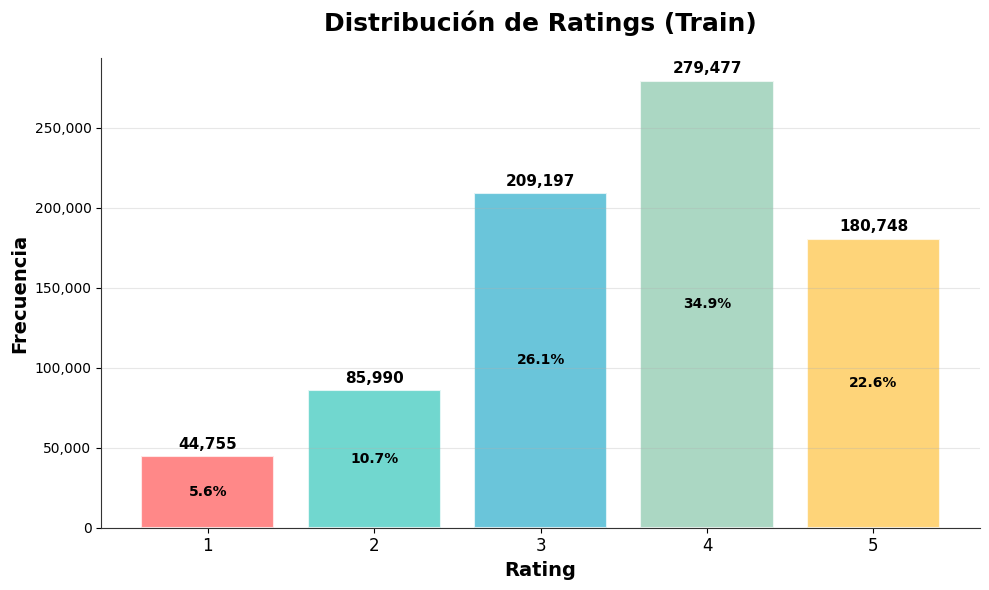

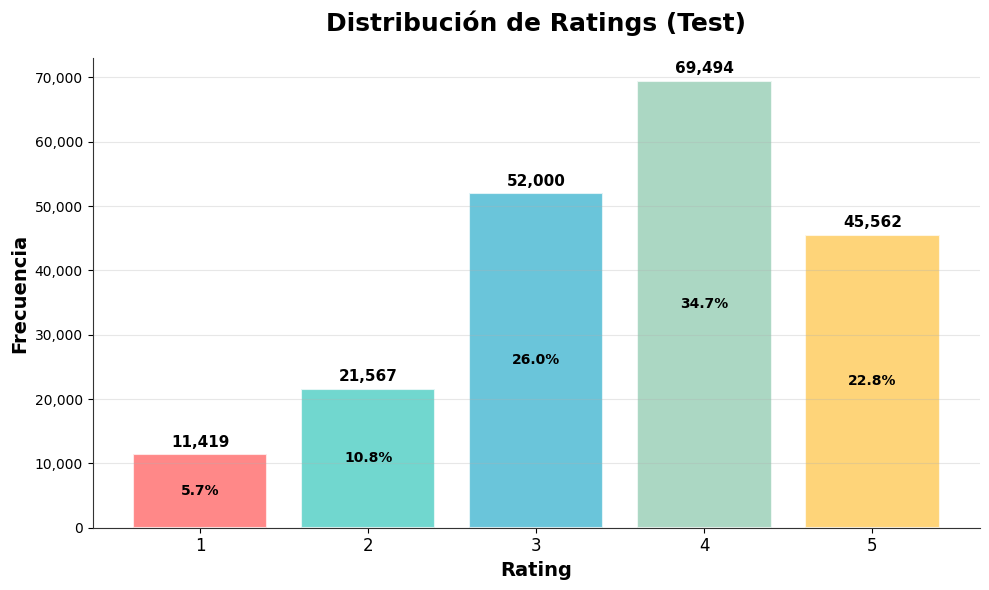

In [21]:
# Distribucion de ratings en train y test
ratings_train = train_data["rating"]
ratings_test = test_data["rating"]
for ratings in [ratings_train, ratings_test]:
    plot_rating_distribution(ratings, "(Train)" if ratings is ratings_train else "(Test)")

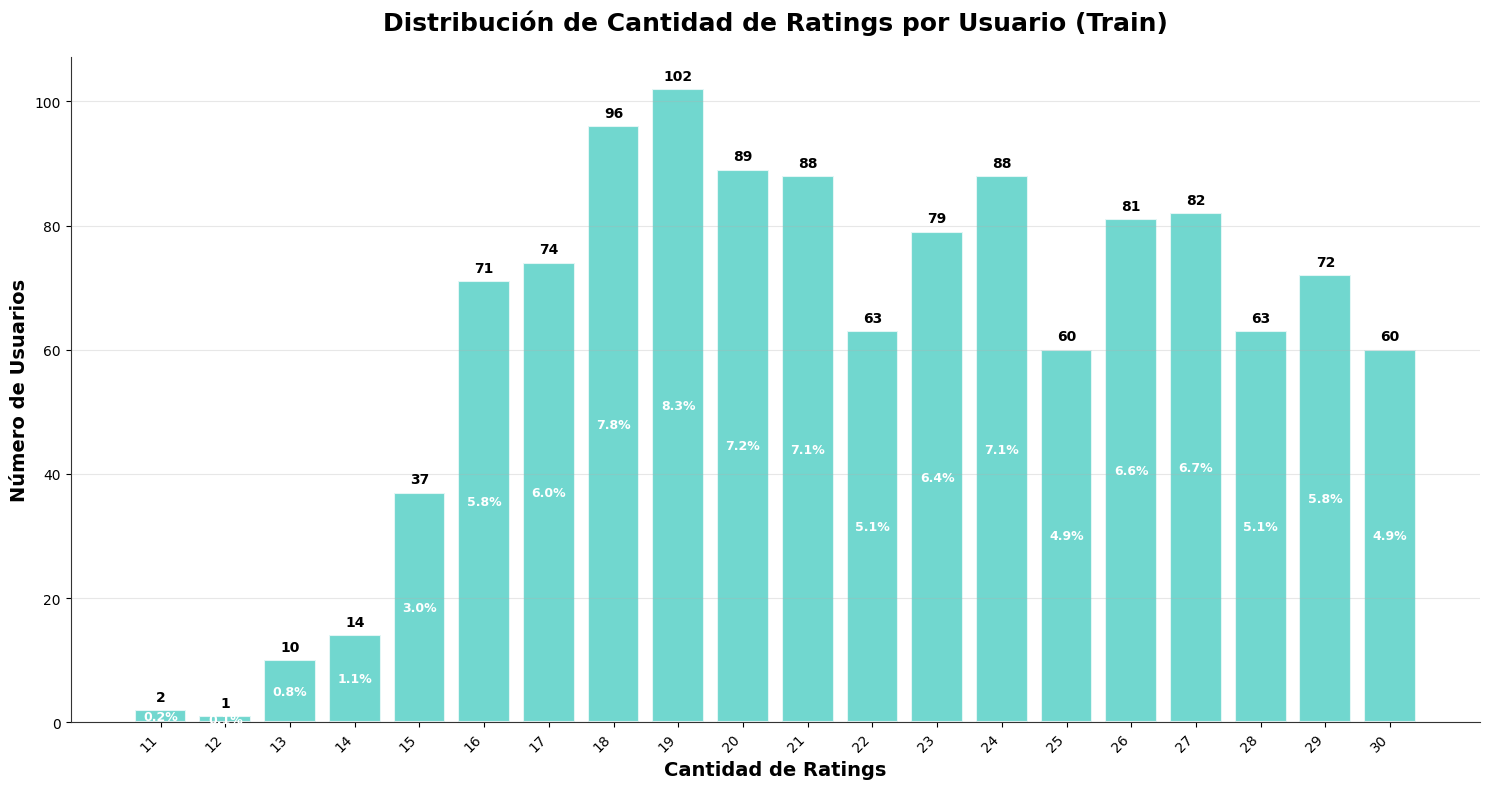

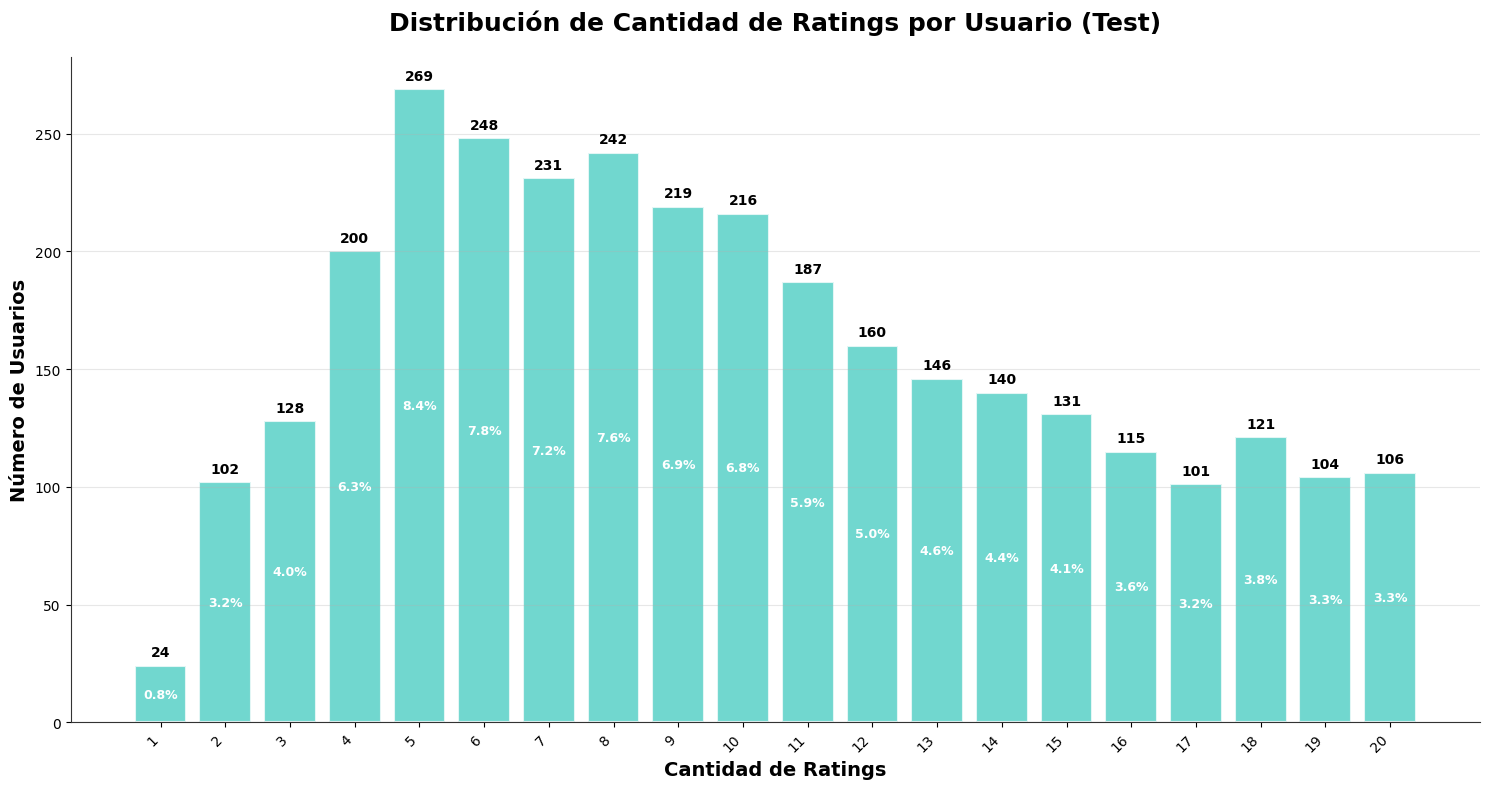

In [22]:
# Distribucion de cantidad de ratings en train y test por usuario
frecuencia_numero_ratings_train = cantidad_ratings_usuario_train.value_counts()
frecuencia_numero_ratings_test = cantidad_ratings_usuario_test.value_counts()

plot_long_tail_distribution(frecuencia_numero_ratings_train,
                             title='Distribución de Cantidad de Ratings por Usuario (Train)',
                             xlabel='Cantidad de Ratings',
                             ylabel='Número de Usuarios')

plot_long_tail_distribution(frecuencia_numero_ratings_test,
                             title='Distribución de Cantidad de Ratings por Usuario (Test)',
                             xlabel='Cantidad de Ratings',
                             ylabel='Número de Usuarios')

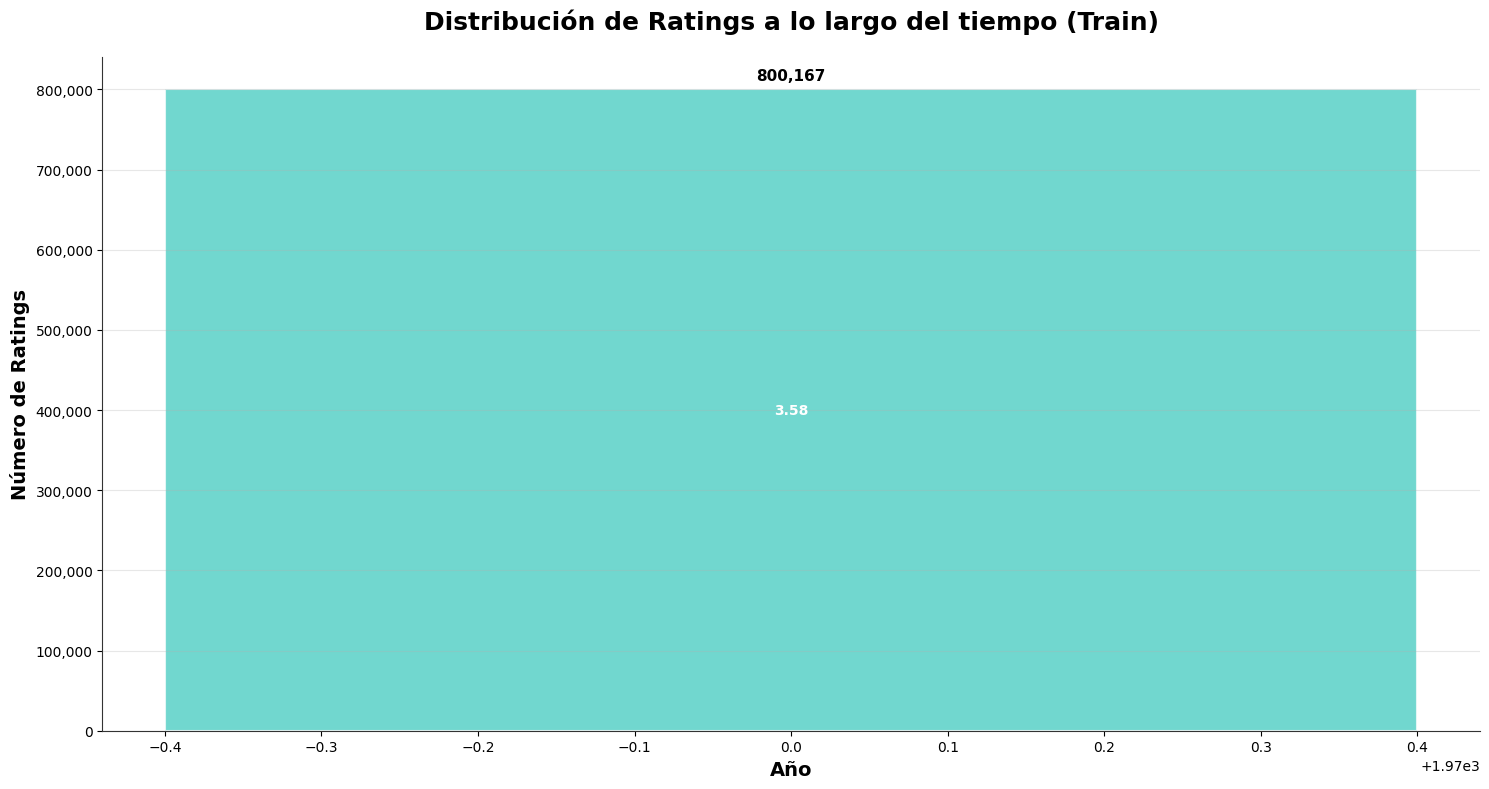

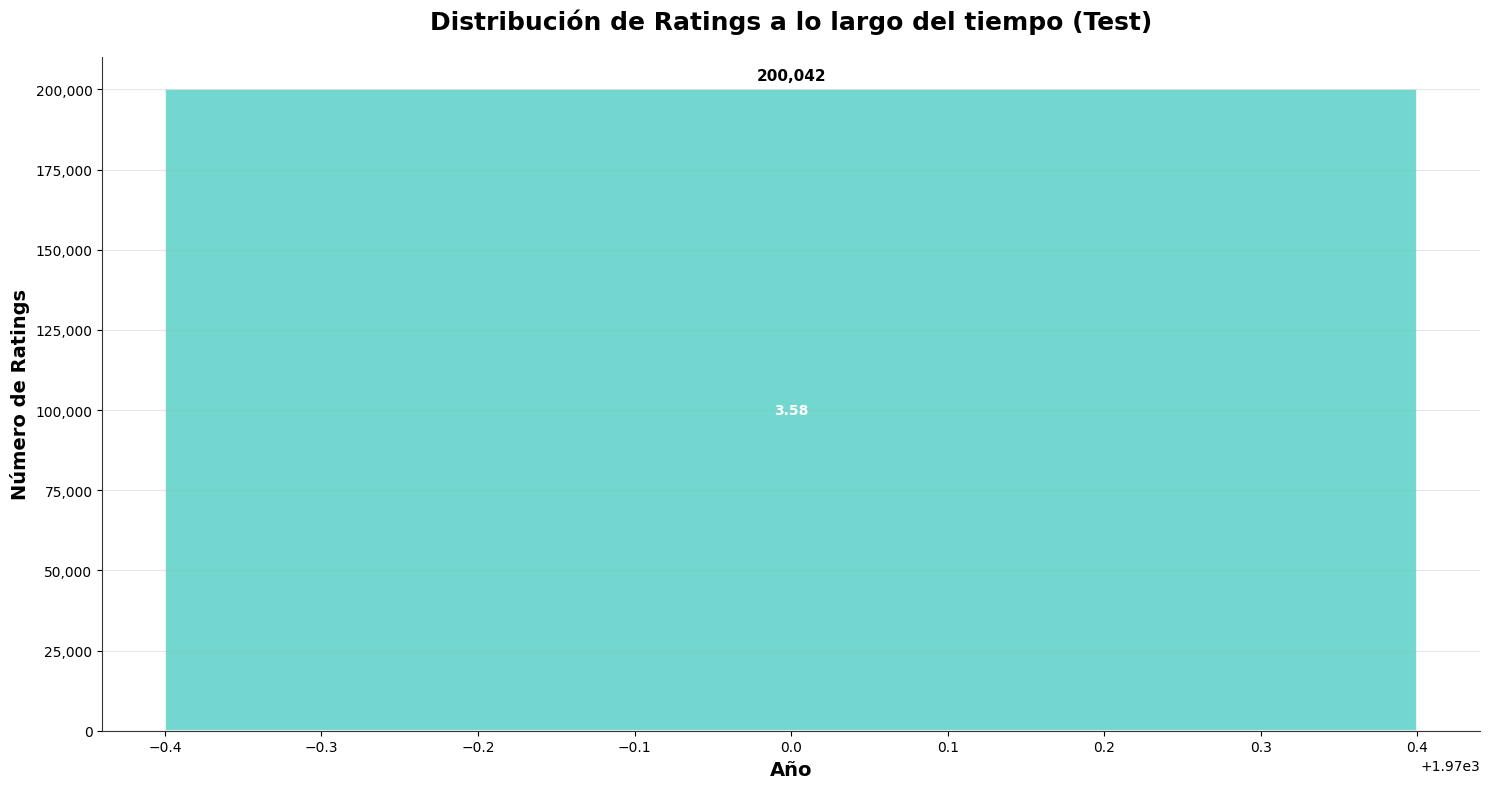

In [23]:
# Distribución temporal de los ratings
plot_ratings_over_time(train_data, title="Distribución de Ratings a lo largo del tiempo (Train)")
plot_ratings_over_time(test_data, title="Distribución de Ratings a lo largo del tiempo (Test)")

In [25]:
def dataset_statistics(df, name="Dataset"):
    n_users = df['userId'].nunique()
    n_items = df['movieId'].nunique()
    n_ratings = len(df)
    avg_ratings_user = n_ratings / n_users
    avg_ratings_item = n_ratings / n_items
    rating_mean = df['rating'].mean()
    rating_std = df['rating'].std()
    max_user_ratings = df.groupby('userId')['rating'].count().max()    # Usuario más activo
    max_item_ratings = df.groupby('movieId')['rating'].count().max()    # Ítem más calificado
    densidad = (n_ratings / (n_users * n_items)) * 100

    return {
        "Dataset": name,
        "Number of Users": n_users,
        "Number of Items": n_items,
        "Total Ratings": n_ratings,
        "Average Ratings/User": round(avg_ratings_user,2),
        "Average Ratings/Item": round(avg_ratings_item,2),
        "Average Rating": round(rating_mean,2),
        "Rating Std": round(rating_std,2),
        "Max Ratings by a User": max_user_ratings,
        "Max Ratings for an Item": max_item_ratings,
        "Density (%)": round(densidad,2)
    }

stats_train = dataset_statistics(train_data, "Training")
stats_test = dataset_statistics(test_data, "Test")

print(stats_train)
print(stats_test)

{'Dataset': 'Training', 'Number of Users': 6040, 'Number of Items': 3682, 'Total Ratings': 800167, 'Average Ratings/User': 132.48, 'Average Ratings/Item': 217.32, 'Average Rating': np.float64(3.58), 'Rating Std': 1.12, 'Max Ratings by a User': 1892, 'Max Ratings for an Item': 2740, 'Density (%)': 3.6}
{'Dataset': 'Test', 'Number of Users': 6038, 'Number of Items': 3439, 'Total Ratings': 200042, 'Average Ratings/User': 33.13, 'Average Ratings/Item': 58.17, 'Average Rating': np.float64(3.58), 'Rating Std': 1.12, 'Max Ratings by a User': 422, 'Max Ratings for an Item': 688, 'Density (%)': 0.96}
